In [11]:
# !pip install pycaret

In [12]:
# !unzip '/content/aviakompaniya.zip'

In [13]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

In [14]:
data = pd.read_csv('/content/train_dataset.csv')
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [15]:
data.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [16]:
data["satisfaction"].value_counts()

0    5000
1    5000
Name: satisfaction, dtype: int64

Tarkib:

Gender: yo'lovchilarning jinsi (ayol, erkak)

Customer Type: mijoz turi (sodiq mijoz, ishonchsiz mijoz)

Age: yo'lovchilarning haqiqiy yoshi

Type of Travel: yo'lovchilar parvozining maqsadi (shaxsiy sayohat, biznes sayohat)

Class: yo'lovchilar samolyotida sayohat klassi (Business, Eco, Eco Plus)

Flight distance: Ushbu sayohatning parvoz masofasi

Inflight wifi service: Parvoz ichidagi Wi-Fi xizmatidan qoniqish darajasi (0: Tegishli emas; 1-5)

Departure/Arrival time convenient: Ketish/Kelish vaqtining qoniqish darajasi

Ease of Online booking: Onlayn bron qilishdan qoniqish darajasi

Gate location: Darvoza joylashuvidan qoniqish darajasi

Food and drink: Oziq-ovqat va ichimlikdan qoniqish darajasi

Online boarding: Onlayn bortdan qoniqish darajasi

Seat comfort: O'rindiqning qulayligidan qoniqish darajasi

Inflight entertainment: Parvoz ichidagi o'yin-kulgidan qoniqish darajasi

On-board service: Bort xizmatidan qoniqish darajasi

Leg room service: oyoq xonasi xizmatidan qoniqish darajasi

Baggage handling: bagajni tashishdan qoniqish darajasi

Check-in service: Ro'yxatdan o'tish xizmatidan qoniqish darajasi

Inflight service: Parvoz ichidagi xizmatdan qoniqish darajasi

Cleanliness: Tozalikdan qoniqish darajasi

Departure Delay in Minutes: jo‘nash vaqtida kechikish daqiqalari

Arrival Delay in Minutes: yetib kelganda kechikish daqiqalari

Satisfaction: Aviakompaniyaning qoniqish darajasi (qoniqish, neytral yoki norozilik)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,5000.500000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Age,10000.0,39.375100,14.897959,7.0,27.00,40.0,51.00,80.0
Flight Distance,10000.0,1229.556200,1022.281958,31.0,421.00,863.5,1806.75,4983.0
Inflight wifi service,10000.0,2.780200,1.362745,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,10000.0,3.065100,1.527316,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,10000.0,2.797800,1.421168,0.0,2.00,3.0,4.00,5.0
Gate location,10000.0,2.981000,1.283278,1.0,2.00,3.0,4.00,5.0
Food and drink,10000.0,3.214500,1.333217,0.0,2.00,3.0,4.00,5.0
Online boarding,10000.0,3.349100,1.352779,0.0,2.00,4.0,4.00,5.0
Seat comfort,10000.0,3.491400,1.311220,0.0,3.00,4.0,5.00,5.0


In [19]:
data.corrwith(data.satisfaction).sort_values()

Departure/Arrival time convenient   -0.067638
Arrival Delay in Minutes            -0.048650
Departure Delay in Minutes          -0.042960
id                                   0.002931
Gate location                        0.007169
Age                                  0.144302
Ease of Online booking               0.164662
Food and drink                       0.207854
Checkin service                      0.232359
Inflight service                     0.240584
Baggage handling                     0.247965
Inflight wifi service                0.277395
Flight Distance                      0.298703
Cleanliness                          0.310338
Leg room service                     0.324368
On-board service                     0.326426
Seat comfort                         0.342294
Inflight entertainment               0.400900
Online boarding                      0.504986
satisfaction                         1.000000
dtype: float64

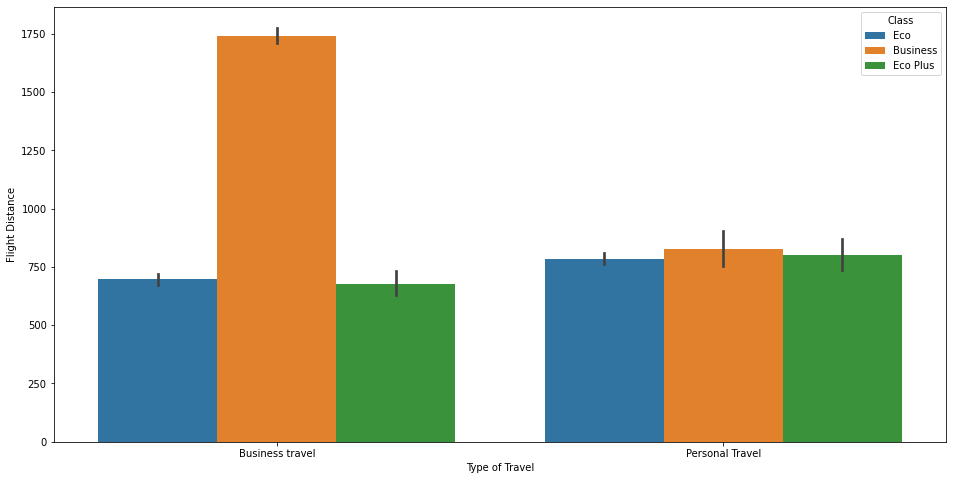

In [20]:
plt.figure(figsize=(16,8))
sns.barplot(data=data, y="Flight Distance", x="Type of Travel" ,hue='Class')

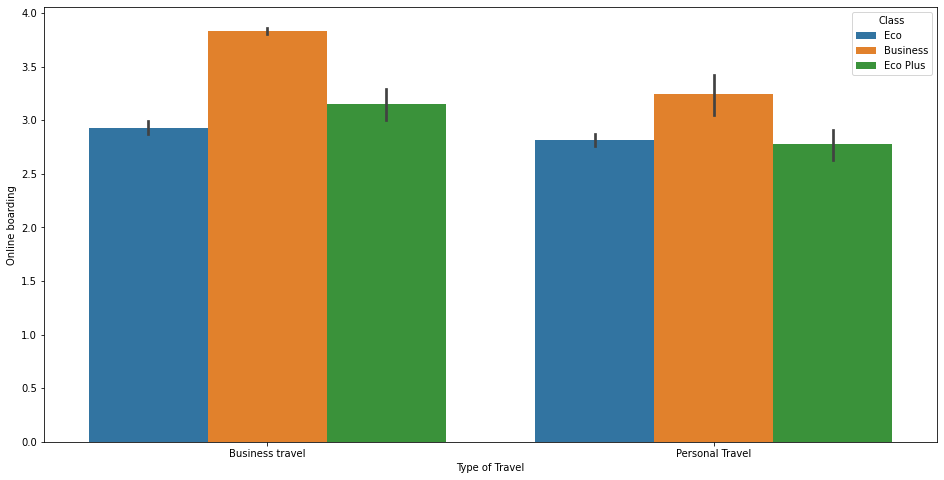

In [21]:
plt.figure(figsize=(16,8))
sns.barplot(data=data, y="Online boarding", x="Type of Travel" ,hue='Class')

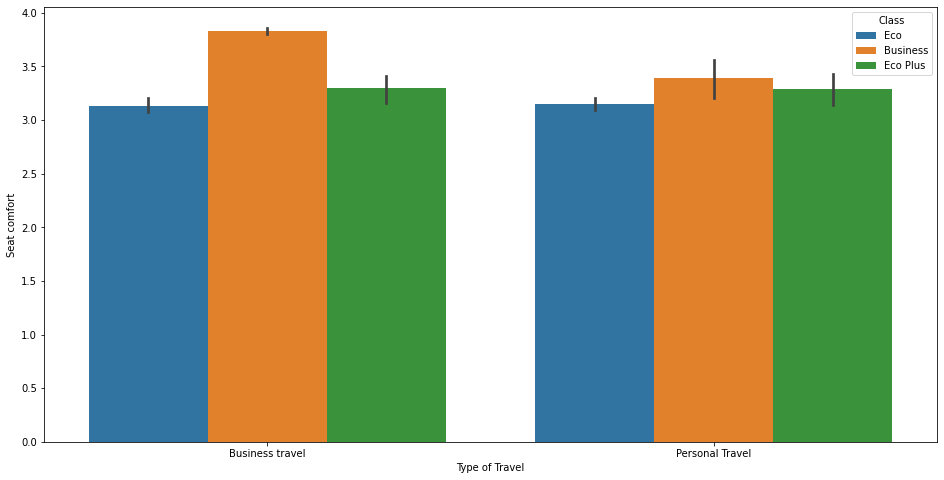

In [22]:
plt.figure(figsize=(16,8))
sns.barplot(data=data, y="Seat comfort", x="Type of Travel" ,hue='Class')

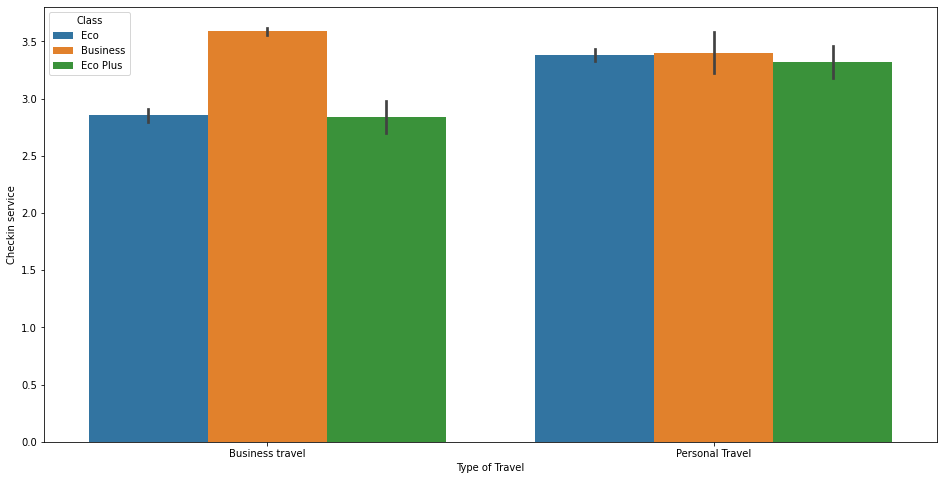

In [23]:
plt.figure(figsize=(16,8))
sns.barplot(data=data, y="Checkin service", x="Type of Travel" ,hue='Class')

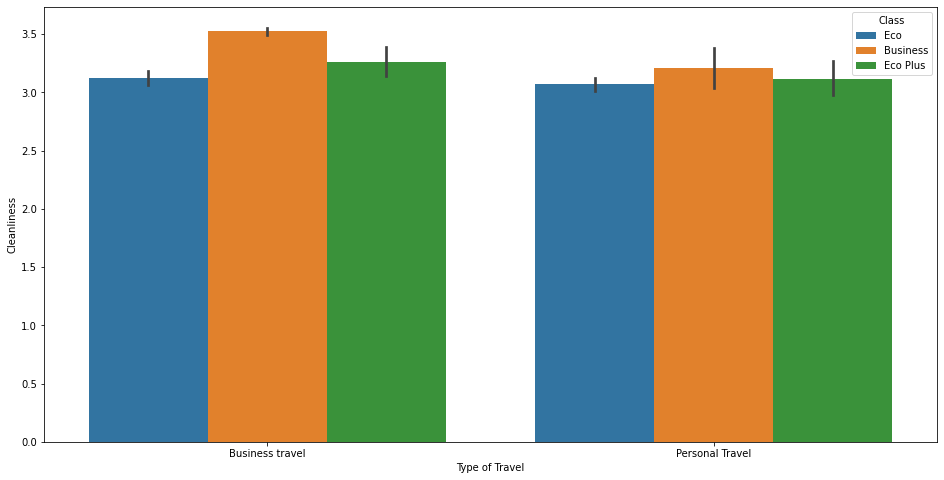

In [24]:
plt.figure(figsize=(16,8))
sns.barplot(data=data, y="Cleanliness", x="Type of Travel" ,hue='Class')

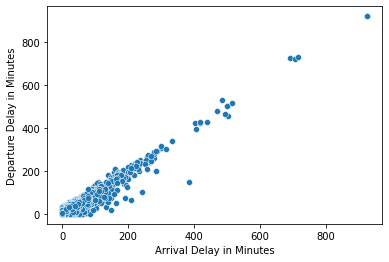

In [25]:
sns.scatterplot(data=data, x="Arrival Delay in Minutes", y="Departure Delay in Minutes")

In [26]:
data

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Female,Loyal Customer,54,Personal Travel,Eco,1068,1,4,1,...,4,4,1,4,4,4,3,21,12.0,0
9996,9997,Female,Loyal Customer,54,Business travel,Eco Plus,1399,4,1,1,...,4,4,4,4,1,4,4,34,21.0,0
9997,9998,Male,Loyal Customer,46,Business travel,Business,1440,3,3,2,...,4,4,4,4,3,4,3,37,38.0,1
9998,9999,Female,Loyal Customer,41,Business travel,Business,90,4,1,4,...,3,4,5,5,5,4,5,64,210.0,1


In [27]:
data['Customer Type'].value_counts()

Loyal Customer       8307
disloyal Customer    1693
Name: Customer Type, dtype: int64

In [28]:
data = pd.get_dummies(data, columns=['Customer Type'], prefix='', prefix_sep='')

In [29]:
data = pd.get_dummies(data, columns=['Type of Travel'], prefix='', prefix_sep='')
data = pd.get_dummies(data, columns=['Gender'], prefix='', prefix_sep='')
data = pd.get_dummies(data, columns=['Class'], prefix='', prefix_sep='')
data.tail()


,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,satisfaction,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Female,Male,Business,Eco,Eco Plus
9995,9996,54,1068,1,4,1,2,2,5,4,...,0,1,0,0,1,1,0,0,1,0
9996,9997,54,1399,4,1,1,1,2,3,3,...,0,1,0,1,0,1,0,0,0,1
9997,9998,46,1440,3,3,2,3,3,4,5,...,1,1,0,1,0,0,1,1,0,0
9998,9999,41,90,4,1,4,4,5,4,5,...,1,1,0,1,0,1,0,1,0,0
9999,10000,41,1747,3,3,3,3,5,3,5,...,1,1,0,1,0,0,1,1,0,0


In [30]:
data.drop(columns = ["Arrival Delay in Minutes"],inplace = True)

In [31]:
data.corrwith(data["satisfaction"]).abs()

id                                   0.002931
Age                                  0.144302
Flight Distance                      0.298703
Inflight wifi service                0.277395
Departure/Arrival time convenient    0.067638
Ease of Online booking               0.164662
Gate location                        0.007169
Food and drink                       0.207854
Online boarding                      0.504986
Seat comfort                         0.342294
Inflight entertainment               0.400900
On-board service                     0.326426
Leg room service                     0.324368
Baggage handling                     0.247965
Checkin service                      0.232359
Inflight service                     0.240584
Cleanliness                          0.310338
Departure Delay in Minutes           0.042960
satisfaction                         1.000000
Loyal Customer                       0.181592
disloyal Customer                    0.181592
Business travel                   

In [32]:
data.to_csv("data_model.csv")

In [60]:
df = pd.read_csv('/content/data_model.csv')
df

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,satisfaction,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Female,Male,Business,Eco,Eco Plus
0,0,1,33,571,2,3,2,4,4,2,...,0,0,1,1,0,0,1,0,1,0
1,1,2,49,1431,4,1,4,4,3,5,...,1,1,0,1,0,1,0,1,0,0
2,2,3,43,867,1,4,4,4,4,4,...,0,1,0,1,0,1,0,0,1,0
3,3,4,27,1550,3,3,3,3,2,2,...,1,1,0,1,0,1,0,1,0,0
4,4,5,11,526,3,4,3,2,4,3,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,54,1068,1,4,1,2,2,5,...,0,1,0,0,1,1,0,0,1,0
9996,9996,9997,54,1399,4,1,1,1,2,3,...,0,1,0,1,0,1,0,0,0,1
9997,9997,9998,46,1440,3,3,2,3,3,4,...,1,1,0,1,0,0,1,1,0,0
9998,9998,9999,41,90,4,1,4,4,5,4,...,1,1,0,1,0,1,0,1,0,0


### Test

In [34]:
test = pd.read_csv('/content/test_dataset.csv')
test.drop(columns = ["Arrival Delay in Minutes",'id'],inplace = True)
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,3,...,3,5,2,4,4,3,5,1,5,152
1,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,1,...,4,4,2,2,2,2,4,2,3,60
2,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,4,...,5,5,5,5,5,5,4,5,4,0
3,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,3,...,0,1,5,4,4,1,3,3,5,0
4,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,3,...,5,5,5,4,5,4,5,5,5,130


In [ ]:
test = pd.get_dummies(test, columns=['Customer Type'], prefix='', prefix_sep='')
test = pd.get_dummies(test, columns=['Type of Travel'], prefix='', prefix_sep='')
test = pd.get_dummies(test, columns=['Gender'], prefix='', prefix_sep='')
test = pd.get_dummies(test, columns=['Class'], prefix='', prefix_sep='')
test.tail()

In [67]:
X = df.drop(columns = ['satisfaction','id','Unnamed: 0'])
y  = df['satisfaction']

In [56]:
from pycaret.classification import *
exp_name = setup(data = data,  target = 'satisfaction')
lr = create_model('rf')
# Random Forest Classifier

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9629,0.9937,0.9566,0.9678,0.9622,0.9257,0.9258
1,0.9514,0.9888,0.9424,0.9589,0.9506,0.9028,0.9030
2,0.9457,0.9900,0.9251,0.9640,0.9441,0.8914,0.8921
3,0.9371,0.9849,0.9222,0.9496,0.9357,0.8742,0.8746
4,0.9557,0.9905,0.9395,0.9702,0.9546,0.9114,0.9118
5,0.9400,0.9853,0.9280,0.9499,0.9388,0.8800,0.8802
6,0.9386,0.9839,0.9193,0.9551,0.9369,0.8771,0.8777
7,0.9414,0.9875,0.9251,0.9554,0.9400,0.8828,0.8833
8,0.9371,0.9875,0.9251,0.9469,0.9359,0.8743,0.8745


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5367, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [68]:
from pycaret.classification import *
exp_name = setup(data = data,  target = 'satisfaction')
lr = create_model('lr')
# Logistic Regression

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9257,0.9706,0.9226,0.9280,0.9253,0.8514,0.8514
1,0.9271,0.9806,0.9226,0.9306,0.9266,0.8543,0.8543
2,0.9229,0.9762,0.9284,0.9178,0.9231,0.8457,0.8458
3,0.9200,0.9703,0.9083,0.9296,0.9188,0.8400,0.8402
4,0.9257,0.9805,0.9226,0.9280,0.9253,0.8514,0.8514
5,0.9400,0.9861,0.9427,0.9373,0.9400,0.8800,0.8800
6,0.9371,0.9807,0.9255,0.9472,0.9362,0.8743,0.8745
7,0.9414,0.9786,0.9312,0.9503,0.9407,0.8828,0.8830
8,0.9257,0.9754,0.9198,0.9304,0.9251,0.8514,0.8515


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8160, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [79]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3332, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
lr.fit(X, y)
predict = lr.predict(test)
df = pd.DataFrame({'id':list(range(1,4001)),'satisfaction':predict})
df.to_csv('predict.csv')
# NATIJA 8.9

In [81]:
from pycaret.classification import *
exp_name = setup(data = data,  target = 'satisfaction')
knn = create_model('knn')
# K Neighbors Classifier

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6257,0.6530,0.6364,0.6257,0.6310,0.2513,0.2514
1,0.6129,0.6434,0.6222,0.6134,0.6178,0.2256,0.2256
2,0.6486,0.6856,0.6449,0.6523,0.6486,0.2972,0.2972
3,0.6329,0.6625,0.6676,0.6267,0.6465,0.2654,0.2660
4,0.6514,0.6819,0.6136,0.6667,0.6391,0.3032,0.3041
5,0.6357,0.6710,0.6364,0.6382,0.6373,0.2714,0.2714
6,0.6271,0.6719,0.6761,0.6182,0.6459,0.2539,0.2550
7,0.6414,0.6879,0.6875,0.6319,0.6585,0.2825,0.2836
8,0.6357,0.6780,0.6534,0.6336,0.6434,0.2713,0.2714


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
knn.fit(X, y)
predict = lr.predict(test)
df = pd.DataFrame({'id':list(range(1,4001)),'satisfaction':predict})
df.to_csv('predict.csv')
# NATIJA 0.86

In [83]:
from pycaret.classification import *
exp_name = setup(data = data,  target = 'satisfaction')
lr = create_model('dt')
# Decision Tree Classifier

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9071,0.9071,0.9060,0.9086,0.9073,0.8143,0.8143
1,0.9371,0.9372,0.9347,0.9400,0.9373,0.8743,0.8743
2,0.9186,0.9187,0.9006,0.9351,0.9175,0.8372,0.8377
3,0.9314,0.9314,0.9290,0.9343,0.9316,0.8629,0.8629
4,0.9057,0.9056,0.9261,0.8907,0.9081,0.8114,0.8120
5,0.9386,0.9385,0.9432,0.9352,0.9392,0.8771,0.8772
6,0.9014,0.9014,0.8977,0.9054,0.9016,0.8029,0.8029
7,0.9243,0.9243,0.9205,0.9284,0.9244,0.8486,0.8486
8,0.9257,0.9257,0.9261,0.9261,0.9261,0.8514,0.8514


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2821, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [85]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2821, splitter='best')
dt.fit(X, y)
predict = dt.predict(test)
df = pd.DataFrame({'id':list(range(1,4001)),'satisfaction':predict})
df.to_csv('predict.csv')
# NATIJA 8.9

In [43]:
from pycaret.classification import *
exp_name = setup(data = data,  target = 'satisfaction')
lr = create_model('svm')
# SVM - Linear Kernel

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5829,0.0,0.9771,0.5463,0.7008,0.1657,0.2695
1,0.5029,0.0,0.0057,1.0000,0.0114,0.0057,0.0535
2,0.7114,0.0,0.4257,0.9933,0.5960,0.4229,0.5153
3,0.7671,0.0,0.8171,0.7429,0.7782,0.5343,0.5370
4,0.7786,0.0,0.8343,0.7506,0.7903,0.5571,0.5606
5,0.7229,0.0,0.5114,0.8861,0.6486,0.4457,0.4919
6,0.5143,0.0,0.0286,1.0000,0.0556,0.0286,0.1204
7,0.6714,0.0,0.9000,0.6176,0.7326,0.3429,0.3855
8,0.7471,0.0,0.8543,0.7035,0.7716,0.4943,0.5060


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=4671, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [38]:
from sklearn.ensemble import RandomForestClassifier
clf =RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=3264, verbose=0,
                       warm_start=False)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=3264, verbose=0,
                       warm_start=False)

In [80]:
predict =clf.predict(test)
# NATIJA 9.53

In [53]:
print(len(test.columns))
print(len(data.columns))

26
28


In [63]:
len(X.columns)

27

In [66]:
X

,Unnamed: 0,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Departure Delay in Minutes,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Female,Male,Business,Eco,Eco Plus
0,0,33,571,2,3,2,4,4,2,4,...,10,0,1,1,0,0,1,0,1,0
1,1,49,1431,4,1,4,4,3,5,4,...,0,1,0,1,0,1,0,1,0,0
2,2,43,867,1,4,4,4,4,4,3,...,0,1,0,1,0,1,0,0,1,0
3,3,27,1550,3,3,3,3,2,2,2,...,0,1,0,1,0,1,0,1,0,0
4,4,11,526,3,4,3,2,4,3,4,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,54,1068,1,4,1,2,2,5,4,...,21,1,0,0,1,1,0,0,1,0
9996,9996,54,1399,4,1,1,1,2,3,3,...,34,1,0,1,0,1,0,0,0,1
9997,9997,46,1440,3,3,2,3,3,4,5,...,37,1,0,1,0,0,1,1,0,0
9998,9998,41,90,4,1,4,4,5,4,5,...,64,1,0,1,0,1,0,1,0,0


In [70]:
len(X.columns)

26

In [ ]:
df = pd.DataFrame({'id':list(range(1,4001)),'satisfaction':predict})
df.to_csv('predict.csv')

In [54]:
X.drop(columns = ['Unnamed: 0'],inplace=True)

In [ ]:
test

In [ ]:
sam = pd.read_csv('/content/sample_submission.csv')
sam.head()

In [ ]:
df.head()

In [71]:
X.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Departure Delay in Minutes,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Female,Male,Business,Eco,Eco Plus
0,33,571,2,3,2,4,4,2,4,4,...,10,0,1,1,0,0,1,0,1,0
1,49,1431,4,1,4,4,3,5,4,5,...,0,1,0,1,0,1,0,1,0,0
2,43,867,1,4,4,4,4,4,3,1,...,0,1,0,1,0,1,0,0,1,0
3,27,1550,3,3,3,3,2,2,2,2,...,0,1,0,1,0,1,0,1,0,0
4,11,526,3,4,3,2,4,3,4,4,...,0,1,0,0,1,0,1,0,1,0


In [72]:
test.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Departure Delay in Minutes,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Female,Male,Business,Eco,Eco Plus
0,25,2704,2,2,2,3,2,3,5,2,...,152,1,0,0,1,1,0,0,1,0
1,49,1623,1,1,1,1,3,4,4,2,...,60,1,0,1,0,1,0,1,0,0
2,51,338,4,4,4,4,2,5,5,5,...,0,1,0,1,0,0,1,1,0,0
3,34,95,0,0,0,3,5,0,1,5,...,0,1,0,1,0,0,1,0,0,1
4,34,602,4,4,4,3,4,5,5,5,...,130,1,0,0,1,0,1,0,1,0


In [ ]:
exp_name = setup(data = data,  target = 'satisfaction')
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9510,0.9924,0.9410,0.9603,0.9504,0.9020,0.9024,0.257
et,Extra Trees Classifier,0.9467,0.9897,0.9379,0.9547,0.9461,0.8934,0.8938,0.911
rf,Random Forest Classifier,0.9453,0.9890,0.9333,0.9563,0.9445,0.8906,0.8911,0.923
gbc,Gradient Boosting Classifier,0.9421,0.9876,0.9330,0.9504,0.9415,0.8843,0.8846,1.331
ridge,Ridge Classifier,0.9283,0.0000,0.9276,0.9290,0.9281,0.8566,0.8568,0.036
lr,Logistic Regression,0.9281,0.9794,0.9250,0.9309,0.9278,0.8563,0.8566,1.364
lda,Linear Discriminant Analysis,0.9277,0.9763,0.9270,0.9284,0.9276,0.8554,0.8557,0.126
dt,Decision Tree Classifier,0.9267,0.9267,0.9307,0.9234,0.9269,0.8534,0.8537,0.070
ada,Ada Boost Classifier,0.9238,0.9772,0.9227,0.9248,0.9236,0.8477,0.8480,0.388
nb,Naive Bayes,0.8737,0.9473,0.8239,0.9148,0.8668,0.7473,0.7512,0.024


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5313, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [86]:
y

0       0
1       1
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    1
Name: satisfaction, Length: 10000, dtype: int64